In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing file
d=pd.read_excel("container_1.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
#shape eof thta input file
d.shape

(2500, 20)

In [4]:
d.head(5)

,Ship_Name,Dwt,LOA,Gt,Beam,Ship_Type,Ship_Type_Grouping,Engine_RPM,Expr1008,Expr1009,LBP,Draft,Depth,TEU,Classed_By,Speed,IMO_No,Date_Acquired,Displacement_Tonnage,Engine_HP_Total
0,A La Marine,20069,170.059998,16023,25.200001,Container Ship (Fully Cellular),Panamax Container Ship,127,14608,14608,160.699997,9.5,14.200000,1440.0,NaN,19.799999,9386524,2019-04-01,27318,14608
1,A. Idefix,23623,182.440002,18263,25.200001,Container Ship (Fully Cellular),Panamax Container Ship,105,22651,22651,173.539993,10.0,14.200000,1686.0,Lloyds Register,20.700001,9354662,2017-11-01,31728,22651
2,A. Obelix,23831,182.490005,18199,25.200001,Container Ship (Fully Cellular),Panamax Container Ship,105,18283,18283,173.539993,10.0,14.200000,1702.0,Lloyds Register,20.600000,9354674,2017-03-01,31729,18283
3,Abidjan Express,39266,222.199997,28592,30.040001,Container Ship (Fully Cellular),Panamax Container Ship,104,34300,34300,210.000000,12.0,16.799999,2824.0,American Bureau of Shipping,22.500000,9303807,2019-03-01,51309,34300
4,Abtin 1,13760,147.839996,9957,23.280001,Container Ship (Fully Cellular),Panamax Container Ship,428,13229,13229,140.300003,8.5,11.500000,1118.0,NaN,19.600000,9379636,2008-10-01,18987,13229


In [5]:
#number of column sin dataset
d.columns

Index(['Ship_Name', 'Dwt', 'LOA', 'Gt', 'Beam', 'Ship_Type',
       'Ship_Type_Grouping', 'Engine_RPM', 'Expr1008', 'Expr1009', 'LBP',
       'Draft', 'Depth', 'TEU', 'Classed_By', 'Speed', 'IMO_No',
       'Date_Acquired', 'Displacement_Tonnage', 'Engine_HP_Total'],
      dtype='object')

In [6]:
#dropping  columns which are ar ehaving hifh correlation 
h=d.drop(["Ship_Name","Ship_Type","Ship_Type_Grouping","Expr1008","Expr1009","IMO_No","Classed_By","Date_Acquired"],axis=1)

In [7]:
c=h.dropna(axis=0,how="any")

In [8]:
c.isnull().sum()

Dwt                     0
LOA                     0
Gt                      0
Beam                    0
Engine_RPM              0
LBP                     0
Draft                   0
Depth                   0
TEU                     0
Speed                   0
Displacement_Tonnage    0
Engine_HP_Total         0
dtype: int64

In [9]:
Y=c["TEU"]

In [10]:
X=c.drop(["TEU","Displacement_Tonnage","Engine_HP_Total","LBP","Gt","Engine_RPM"],axis=1)

In [11]:
X.head(10)

,Dwt,LOA,Beam,Draft,Depth,Speed
0,20069,170.059998,25.200001,9.50,14.200000,19.799999
1,23623,182.440002,25.200001,10.00,14.200000,20.700001
2,23831,182.490005,25.200001,10.00,14.200000,20.600000
3,39266,222.199997,30.040001,12.00,16.799999,22.500000
4,13760,147.839996,23.280001,8.50,11.500000,19.600000
5,7997,132.539993,19.200001,6.98,9.200000,18.000000
6,11200,139.199997,19.600000,8.30,11.000000,17.200001
7,13658,147.850006,23.280001,8.51,11.500000,19.600000
8,24279,196.869995,27.879999,11.00,16.600000,22.000000
9,8483,132.699997,19.200001,7.65,10.500000,17.000000


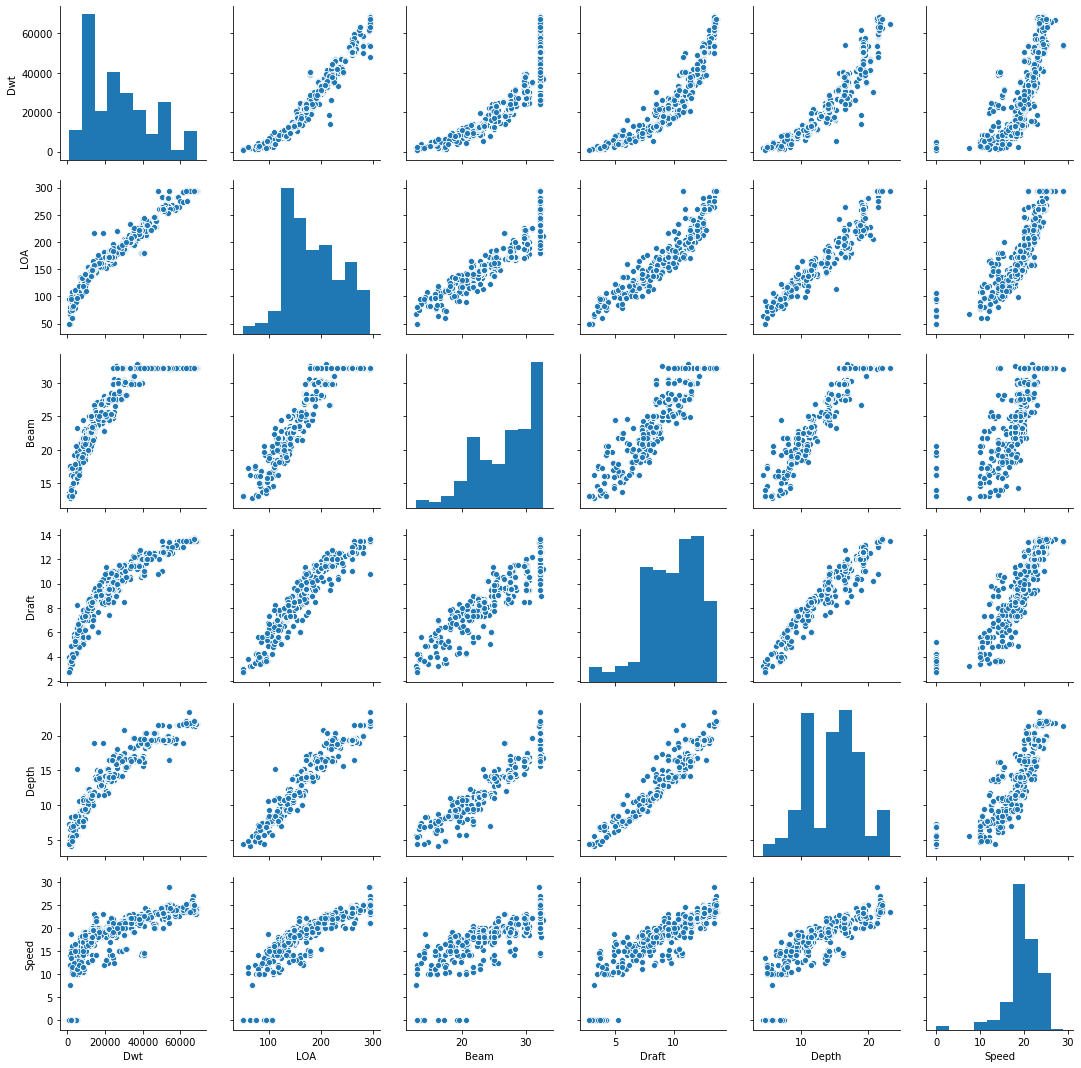

In [14]:
#visualising pair plot
sns.pairplot(X)

In [15]:
#importing linear regression model
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#seprating train and test dataset
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [18]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#test data score
model.score(xtest,ytest)

0.9844650179130228

In [20]:
#intercept
model.coef_

array([ 6.16412005e-02,  8.38111715e+00,  3.87463537e+00, -1.08269644e+02,
        2.39369948e+00,  1.45865181e+01])

In [21]:
#prediction 
#ENTER
#(Dwt	LOA	Beam	Draft	Depth	Speed) 

In [22]:
model.predict([[46000,228,32,12.5,20,20]])

array([3360.00398938])